In [1]:
import functional_diversity as FD

In [2]:
FD.scramble_word("cat", p=0.1)

'cat'

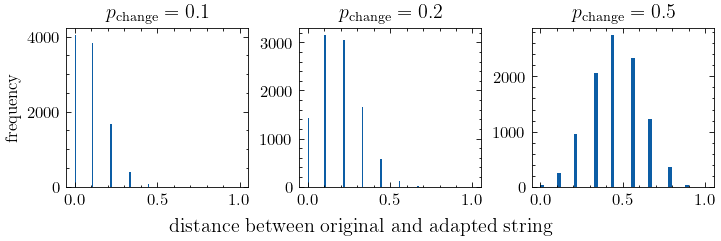

In [5]:
import matplotlib.pyplot as plt
plt.style.use("science")
plt.rcParams["figure.dpi"] = 120
from Levenshtein import ratio as edit_distance

source = "professor"

fig, axes = plt.subplots(ncols=3, figsize=(6, 2), sharex=True, constrained_layout=True)

for i, p in enumerate((0.1, 0.2, 0.5)):
    dists = [1 - edit_distance(source, FD.scramble_word(source, p=p)) for _ in range(10000)]
    axes[i].hist(dists, bins="fd");
    axes[i].set(title=fr"$p_{{\text{{change}}}} = {p}$")
axes[0].set_ylabel("frequency")
fig.supxlabel("distance between original and adapted string");

In [340]:
from spacy.lang.en import English

tokenizer = English().tokenizer

with open("../data/ARCHER3/ARCHER_3-2_TXT/am_advertising/1957sear_a8a.txt", encoding="latin-1") as f:
    text = f.read()

tokens = [token.text.lower() for token in tokenizer(text) if token.text.isalpha()]

In [308]:
diffs = []
for _ in range(10000):
    scrambled_tokens = FD.scramble_text(tokens, p=0.2, q=0.2)
    diffs.append(len(set(scrambled_tokens)) - len(set(tokens)))

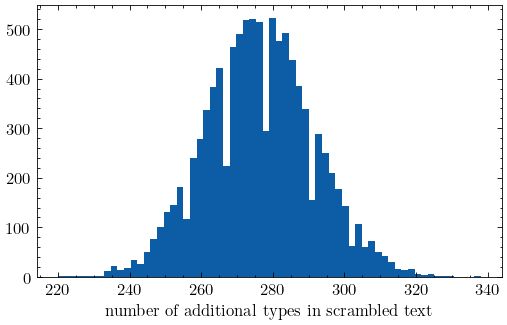

In [309]:
fig, ax = plt.subplots(figsize=(5, 3))
ax.hist(diffs, bins="fd")
ax.set(xlabel="number of additional types in scrambled text");

In [321]:
import numpy as np

diff = np.zeros((100, 1000))
ps = np.linspace(0.0, 1.0, 100)
for i, p in enumerate(ps):
    for j in range(1000):
        scrambled_tokens = FD.scramble_text(tokens, p=p, scramble_p=0.2)
        diff[i, j] = len(set(scrambled_tokens)) / len(set(tokens))

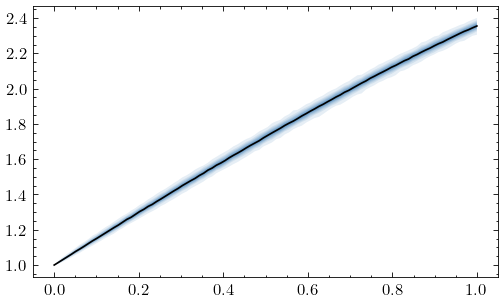

In [322]:
import utils

fig, ax = plt.subplots(figsize=(5, 3))
utils.tsplot(diff.T, x=ps, n=10, ax=ax);

What happens with longer or more texts?

In [343]:
import pathlib
from tqdm.notebook import tqdm

corpus = "../data/ARCHER3/ARCHER_3-2_TXT/br_fiction/"
tokens = []
for fn in pathlib.Path(corpus).iterdir():
    with fn.open(encoding="latin-1") as f:
        text = f.read()
        tokens += [token.text.lower() for token in tokenizer(text) if token.text.isalpha()]


diff_long = np.zeros((100, 100))
ps = np.linspace(0.0, 1.0, 100)
for i, p in enumerate(tqdm(ps)):
    for j in range(100):
        scrambled_tokens = FD.scramble_text(tokens, p=p, q=0.2)
        diff_long[i, j] = len(set(scrambled_tokens)) / len(set(tokens))

  0%|          | 0/100 [00:00<?, ?it/s]

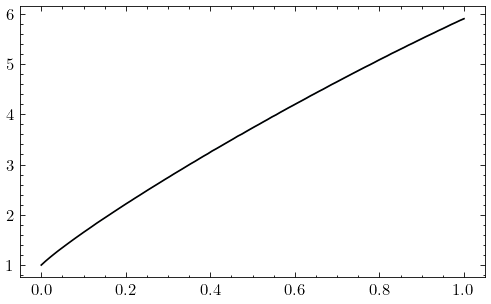

In [344]:
fig, ax = plt.subplots(figsize=(5, 3))
utils.tsplot(diff_long.T, x=ps, n=10, ax=ax);

## Functional Diversity

In [9]:
import numpy as np

dm = np.array(
    [
        [0, 2, 8, 8],
        [2, 0, 8, 8],
        [8, 8, 0, 6],
        [8, 8, 6, 0]
    ])

counts = np.array([20, 15, 10, 5])

/Users/folgert/projects/unseen-semantic-diversity/notebooks/functional_diversity.py:21: RuntimeWarning: invalid value encountered in true_divide
  a = np.inner(1 - dm / tau, counts)


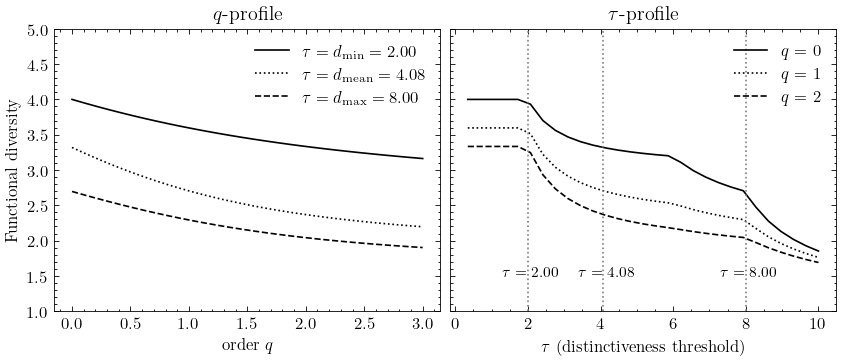

In [38]:
fig, axes = plt.subplots(ncols=2, figsize=(7, 3), constrained_layout=True, sharey=True)

tau_fns = np.min, FD.RaoQ, np.max
tau_names = "min mean max".split()
ls = 'solid', 'dotted', 'dashed'

q_profile = FD.compute_q_profile(counts, dm, 0, 3)
for i, hn in enumerate(q_profile["profile"]):
    axes[0].plot(
        q_profile["q_values"], hn, color="k", ls=ls[i], 
        label=fr"$\tau = d_{{\text{{{tau_names[i]}}}}} = {q_profile['tau_values'][i]:.2f}$")  
axes[0].set(ylim=(1, 5), ylabel="Functional diversity", xlabel="order $q$", title="$q$-profile")
axes[0].legend()


tau_profile = FD.compute_tau_profile(counts, dm, 0, 10)
for i, hn in enumerate(tau_profile["profile"].T):
    axes[1].plot(
        tau_profile["tau_values"], hn, color="k", ls=ls[i], label=f"$q$ = {tau_profile['q_values'][i]}")
axes[1].set(title=r"$\tau$-profile", xlabel=r"$\tau$ (distinctiveness threshold)")

for i, tau in enumerate(q_profile["tau_values"]):
    axes[1].axvline(tau, ls="dotted", color="grey")
    axes[1].annotate(fr"$\tau = {tau:.2f}$", xy=(tau - 0.7, 1.5), fontsize=9)
axes[1].legend();
plt.savefig("../output/FD-profiles-demo.png", dpi=300)